# PiML Toolbox: High-code Demo for TaiwanCredit Data

This example notebook demonstrates how to use PiML with its high-code APIs for the TaiwanCredit data from UCI repository, which consists of 30,000 credit card clients in Taiwan from 200504 to 200509; see details [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). The data can be loaded from PiML and it is subject to slight preprocessing. 

The response `FlagDefault` is binary and it is a classification problem.

# Stage 0: Install PiML package on Google Colab

1. Run `!pip install piml` to install the latest version of PiML. It requires V0.2 or above to use high-code APIs.
2. In Colab, you'll need restart the runtime in order to use newly installed PiML version.

In [1]:
!pip install piml

In [2]:
!pip install statsmodels -U # install version>=0.13 to get more stable curve fit in some plots
!pip install numpy==1.23.5
!pip install xgboost==1.7.2

In [3]:
from piml import Experiment
exp = Experiment()

# Stage 1: Initialize an experiment, Load and Prepare data

In [5]:
exp.data_loader(data='TaiwanCredit')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,FlagDefault
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,0.0,0.0,3.592621,3.491782,2.838849,0.000000,0.000000,0.000000,0.000000,2.838849,0.000000,0.000000,0.000000,0.000000,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,3.428621,3.237041,3.428621,3.514946,3.538574,3.513484,0.000000,3.000434,3.000434,3.000434,0.000000,3.301247,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,4.465977,4.146996,4.132260,4.156307,4.174612,4.191731,3.181558,3.176381,3.000434,3.000434,3.000434,3.699057,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,4.672015,4.683353,4.692776,4.452016,4.461799,4.470528,3.301247,3.305351,3.079543,3.041787,3.029384,3.000434,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,3.935406,3.753660,4.554319,4.320997,4.282101,4.281760,3.301247,4.564453,4.000043,3.954291,2.838849,2.832509,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,5.276345,5.285143,5.318827,4.944507,4.494683,4.203604,3.929470,4.301052,3.699317,3.484015,3.699057,3.000434,0.0
29996,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,3.226342,3.262214,3.544440,3.953276,3.715251,0.000000,3.264345,3.547405,3.954194,2.113943,0.000000,0.000000,0.0
29997,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3.552181,3.525951,3.440752,4.319710,4.313509,4.286861,0.000000,0.000000,4.342442,3.623353,3.301247,3.491502,1.0
29998,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-3.216430,4.894205,4.882553,4.722428,4.073938,4.689708,4.933998,3.532754,3.071514,3.284882,4.723989,3.256477,1.0


In [6]:
# Use only payment history attributes: Pay_1~6, BILL_AMT1~6 and PAY_AMT1~6 (i.e., exclude all others); Keep the response `FlagDefault`
exp.data_summary(feature_exclude=["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE"], feature_type={})

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='Data Shape:(30000, 24)')

In [7]:
exp.data_prepare(target='FlagDefault', task_type='Classification', test_ratio=0.2, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,0,1
0,Excluded columns,"[MARRIAGE, LIMIT_BAL, SEX, EDUCATION, AGE]"
1,Target variable,FlagDefault
2,Sample weight,None
3,Task type,Classification
4,Split method,Random
5,Test ratio,0.2
6,Random state,0


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

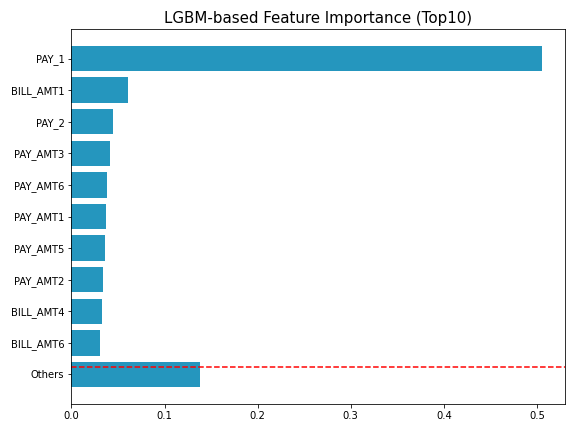

In [8]:
exp.feature_select(method="pfi", threshold=0.9)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

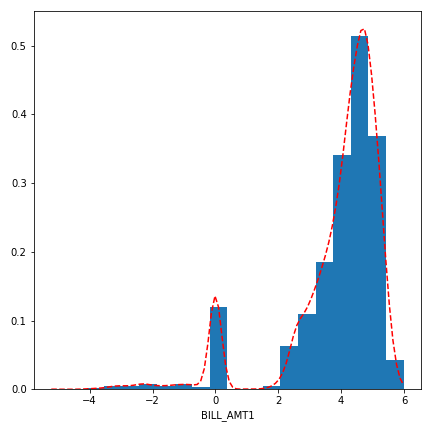

In [9]:
exp.eda(show='univariate', uni_feature='BILL_AMT1')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

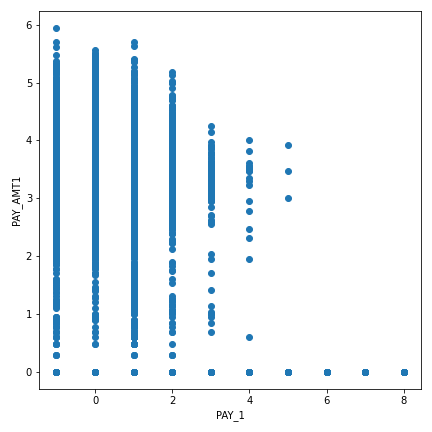

In [10]:
exp.eda(show='bivariate', bi_features=['PAY_1', 'PAY_AMT1'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

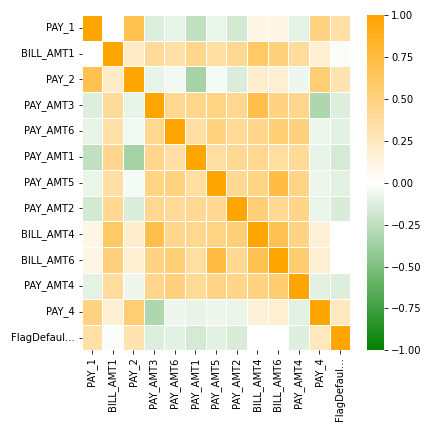

In [11]:
exp.eda(show='multivariate', multi_type='correlation_heatmap')

# Stage 2. Train intepretable models 

In [12]:
## ReLU-DNN: ReLU Deep Neural Networks with L1-Regularization, e.g. L1_reg = 0.0008
from piml.models import ReluDNNClassifier

clf1 = ReluDNNClassifier(hidden_layer_sizes=(40, 40), l1_reg=0.0008,
                        batch_size=500, learning_rate=0.001)
exp.model_train(model=clf1, name='ReLU-DNN')
exp.model_diagnose(model="ReLU-DNN", show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value="<p class='notification info'>Register ReLU-DNN Done</p>")

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.8120,0.7441,0.3002,0.6741,0.4154
Test,0.8195,0.7433,0.3053,0.6851,0.4224
Gap,0.0075,-0.0008,0.0051,0.0110,0.0070


In [13]:
## GAMI-Net: GAM-Neural Networks with Structured Interactions
from piml.models import GAMINetClassifier

clf2 = GAMINetClassifier(interact_num=10, loss_threshold=0.01,  
                        subnet_size_main_effect=[20], 
                        subnet_size_interaction=[20,20])
exp.model_train(model=clf2, name='GAMI-Net')
exp.model_diagnose(model="GAMI-Net", show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value="<p class='notification info'>Register GAMI-Net Done</p>")

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.8163,0.7685,0.3289,0.6804,0.4434
Test,0.8222,0.7650,0.3315,0.6825,0.4463
Gap,0.0058,-0.0035,0.0026,0.0022,0.0029


In [14]:
## EBM: Explainable Boosting Machine from MS Research
from piml.models import ExplainableBoostingClassifier

clf3 = ExplainableBoostingClassifier(interactions=10, random_state=0)
exp.model_train(model=clf3, name='EBM')
exp.model_diagnose(model="EBM", show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value="<p class='notification info'>Register EBM Done</p>")

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.8212,0.7816,0.3647,0.6841,0.4757
Test,0.8275,0.7738,0.3678,0.6893,0.4796
Gap,0.0063,-0.0078,0.0031,0.0052,0.0039


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

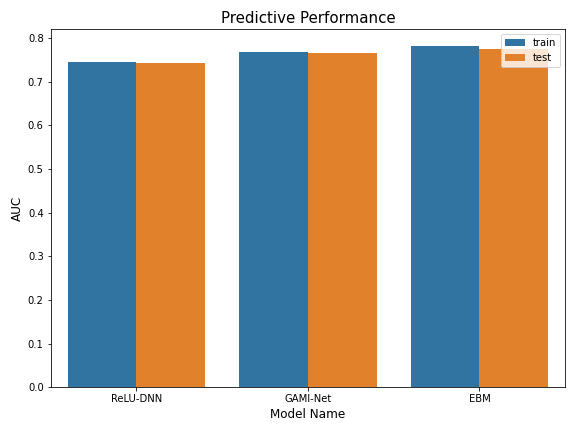

In [15]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='accuracy_plot', metric="AUC")

# Stage 3. Explain and Interpret

## Post-hoc Explaination: Global and Local Methods

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

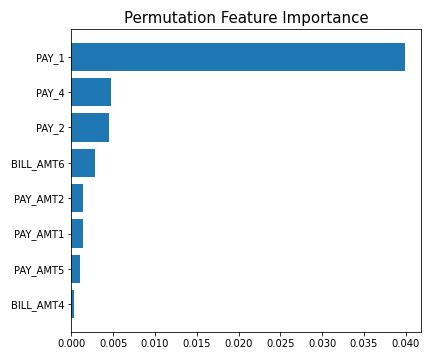

In [16]:
exp.model_explain(model='ReLU-DNN', show='pfi', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

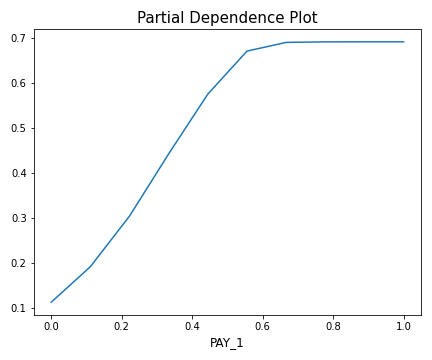

In [17]:
exp.model_explain(model='ReLU-DNN', show='pdp', uni_feature='PAY_1', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

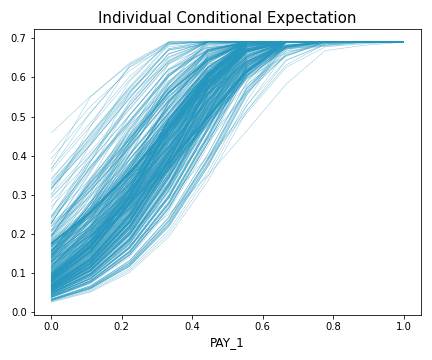

In [18]:
exp.model_explain(model='ReLU-DNN', show='ice', uni_feature="PAY_1", figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Exact explainer: 21it [00:29,  1.49s/it]                                                                               


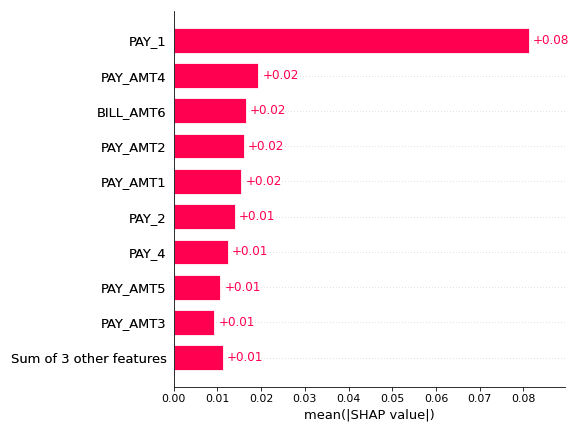

In [19]:
exp.model_explain(model='ReLU-DNN', show='shap_fi', sample_size=20)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

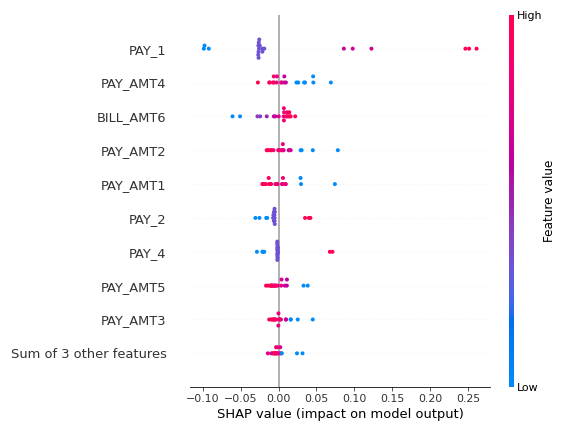

In [20]:
exp.model_explain(model='ReLU-DNN', show='shap_summary', sample_size=20)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

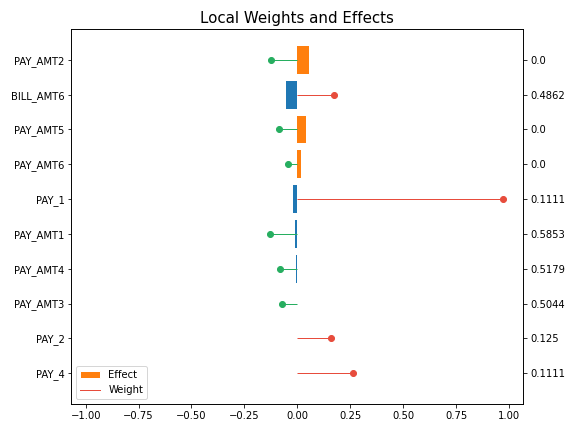

In [21]:
exp.model_explain(model='ReLU-DNN', show='lime', sample_id=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

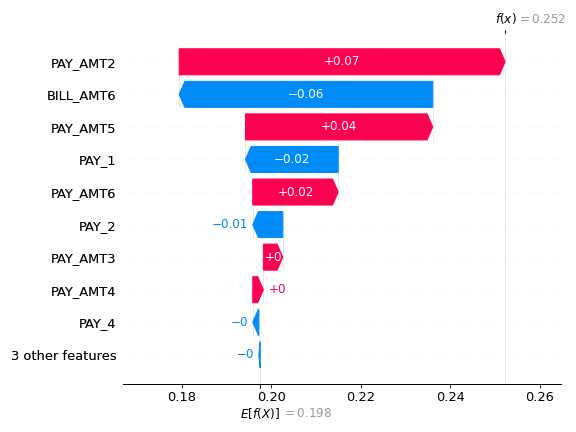

In [22]:
exp.model_explain(model='ReLU-DNN', show='shap_waterfall', sample_id=0)

## Inherent Interpretation: Global and Local Methods

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

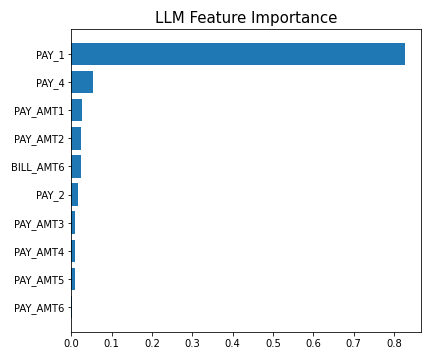

In [23]:
exp.model_interpret(model='ReLU-DNN', show='global_fi', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

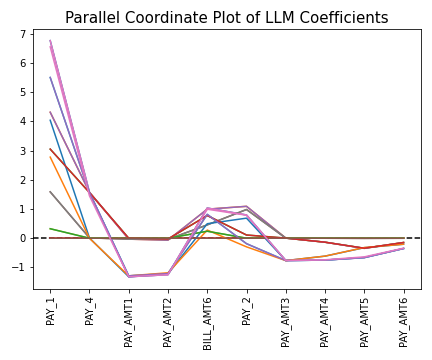

In [24]:
exp.model_interpret(model='ReLU-DNN', show='llm_pc', figsize=(6,5))

In [25]:
exp.model_interpret(model='ReLU-DNN', show='llm_summary', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Count,Response Mean,Response Std,Local AUC,Global AUC
0,16885.0,0.1534,0.3604,0.6656,0.7330
1,6078.0,0.3337,0.4716,0.6908,0.7139
2,329.0,0.6505,0.4776,0.5565,0.7177
3,245.0,0.7102,0.4546,0.3841,0.6279
4,155.0,0.7290,0.4459,0.7305,0.7139
5,71.0,0.6338,0.4852,0.6526,0.6812
6,57.0,0.6316,0.4867,0.5304,0.7330
7,50.0,0.9000,0.3030,0.4511,0.6812
8,49.0,0.7959,0.4072,0.6308,0.6353
9,26.0,0.7692,0.4297,0.6083,0.7284


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

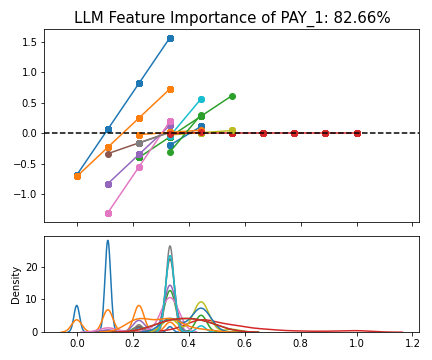

In [26]:
exp.model_interpret(model='ReLU-DNN', show='global_effect_plot', uni_feature='PAY_1', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

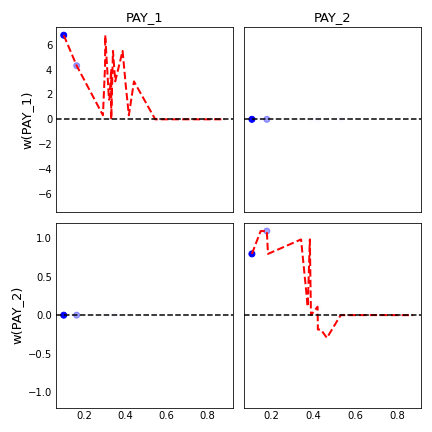

In [27]:
exp.model_interpret(model='ReLU-DNN', show='global_effect_plot', 
                    bi_features=['PAY_1', 'PAY_2'], figsize=(6,6))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

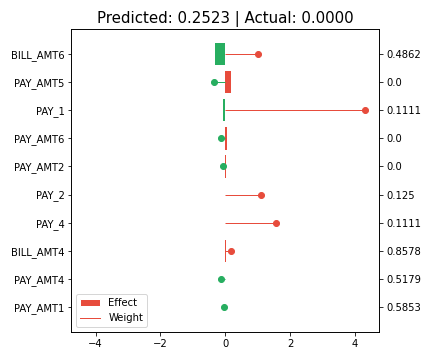

In [28]:
exp.model_interpret(model='ReLU-DNN', show='local_fi', sample_id=0, figsize=(6,5))

# Stage 4. Diagnose and Compare

In [29]:
exp.model_diagnose(model='ReLU-DNN', show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.8120,0.7441,0.3002,0.6741,0.4154
Test,0.8195,0.7433,0.3053,0.6851,0.4224
Gap,0.0075,-0.0008,0.0051,0.0110,0.0070


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

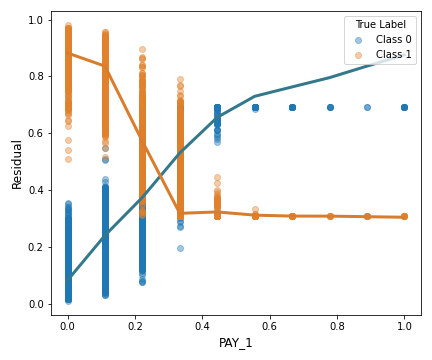

In [30]:
exp.model_diagnose(model='ReLU-DNN', show='accuracy_residual', target_feature='PAY_1', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

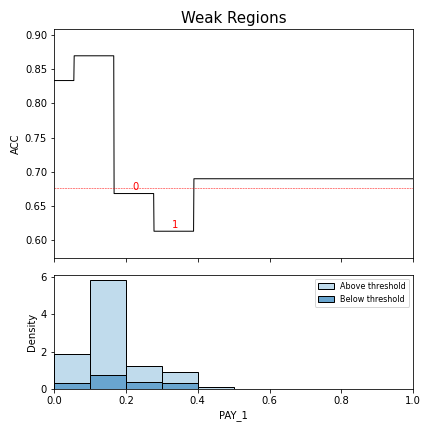

In [31]:
exp.model_diagnose(model='ReLU-DNN', show='weakspot', slice_features=['PAY_1'], 
                   slice_method='tree', threshold=1.2, min_sample=20, figsize=(6, 6))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

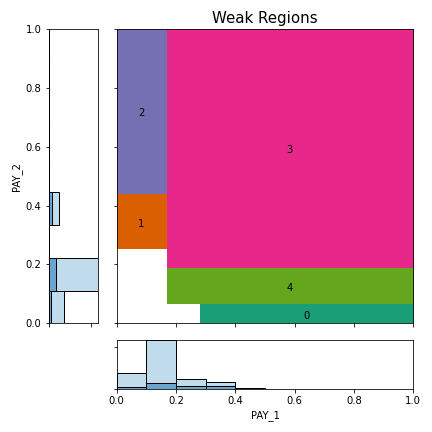

In [32]:
exp.model_diagnose(model='ReLU-DNN', show='weakspot', slice_features=['PAY_1', 'PAY_2'], 
                   slice_method='tree', threshold=1.2, min_sample=20, figsize=(6, 6))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

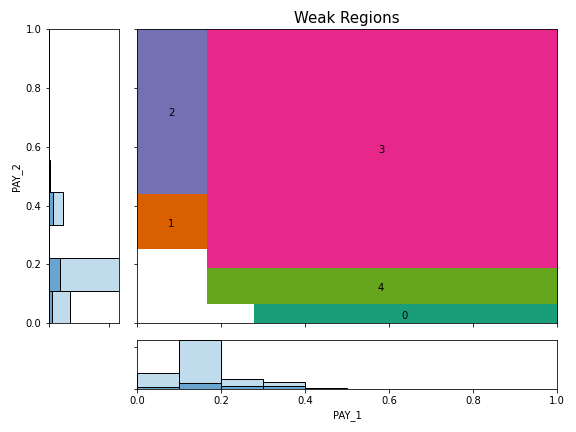

In [33]:
exp.model_diagnose(model='ReLU-DNN', show='weakspot', slice_features=['PAY_1', 'PAY_2'], 
                   slice_method='tree', threshold=1.2, min_sample=20)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

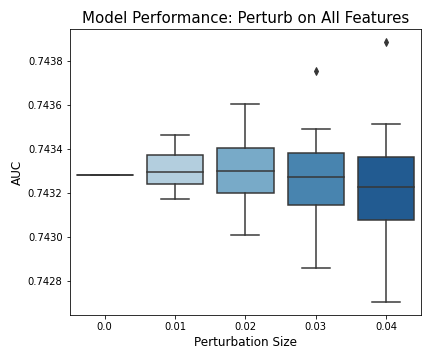

In [34]:
exp.model_diagnose(model='ReLU-DNN', show='robustness_perf', perturb_features='All Features', 
                   perturb_size=0.01, alpha=0.2, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

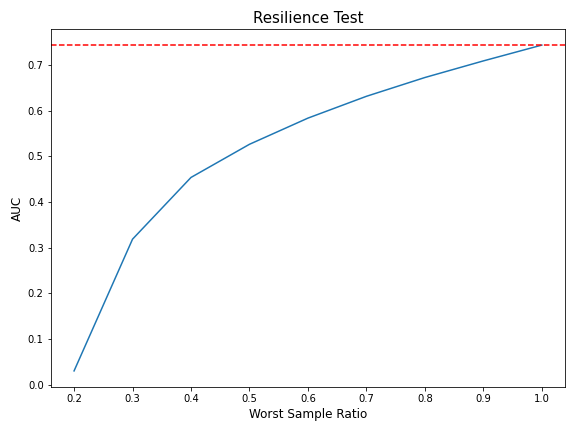

In [35]:
exp.model_diagnose(model='ReLU-DNN', show='resilience_perf', immu_feature=None, 
                   target_feature='PAY_1', alpha=0.1)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

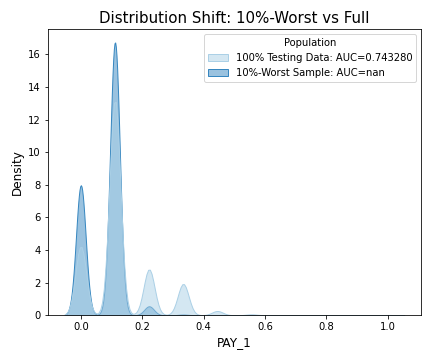

In [36]:
exp.model_diagnose(model='ReLU-DNN', show='resilience_shift_density', immu_feature=None, 
                   target_feature='PAY_1', alpha=0.1, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

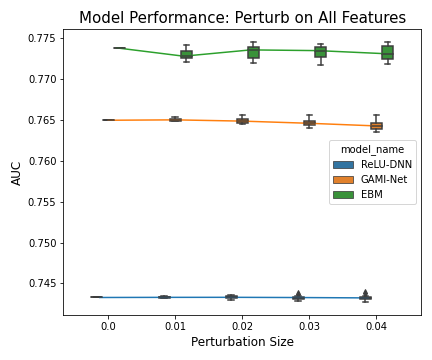

In [37]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='robustness_perf', 
                  perturb_size=0.01, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

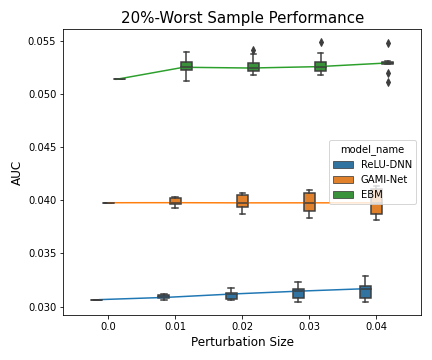

In [38]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='robustness_perf_worst', 
                  perturb_size=0.01, alpha=0.2, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

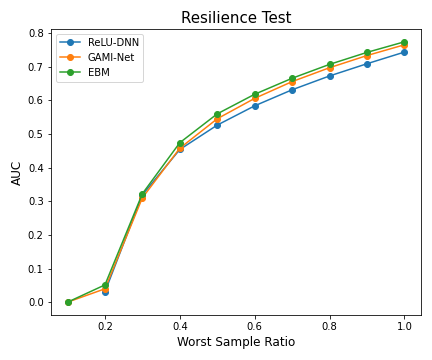

In [39]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='resilience_perf', 
                   immu_feature=None, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

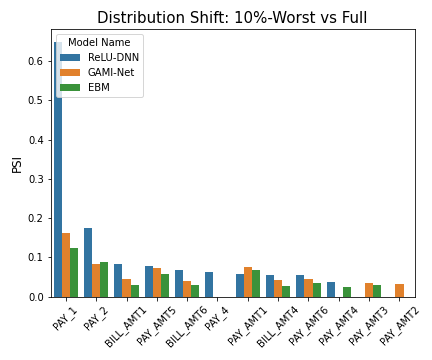

In [40]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='resilience_distance', 
                   immu_feature=None, figsize=(6,5))